# 概要
https://www.kaggle.com/c/digit-recognizer
単純な例


# データ読み込み

In [137]:
import pandas as pd
import numpy as np

train = pd.read_csv("./data/digit-recognizer/train.csv")
print(train.shape)

test= pd.read_csv("./data/digit-recognizer/test.csv")
print(test.shape)

X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

train.head()

np.random.seed(666)
# test.head()

(42000, 785)
(28000, 784)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

# Data Visualization 可視化

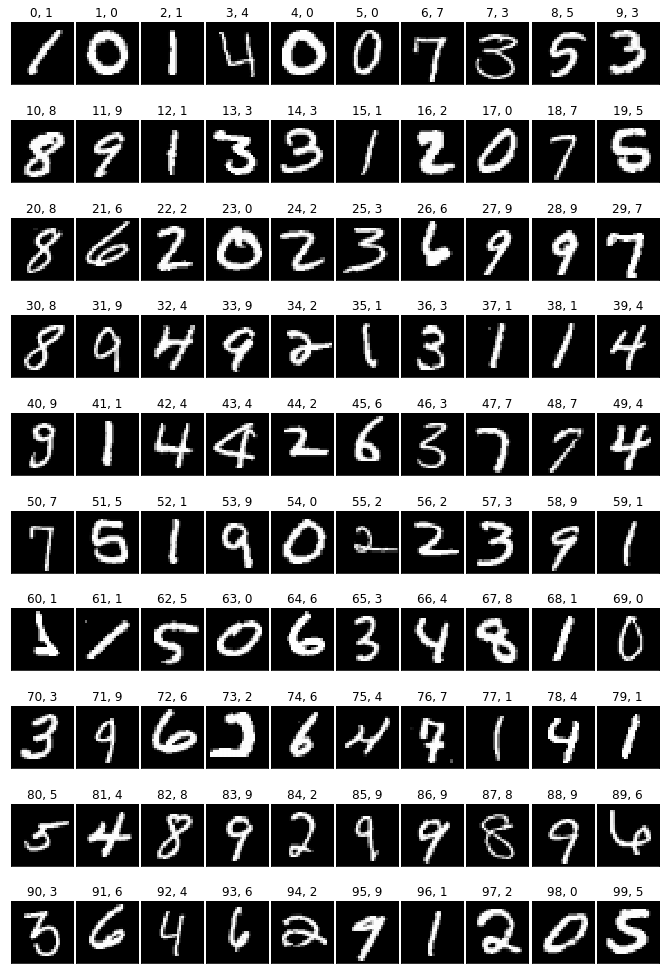

In [135]:

import matplotlib.pyplot as plt
%matplotlib inline

X_train = X_train.reshape(X_train.shape[0], 28, 28)

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.05, wspace=0.05)
index = 0 # 100*n
for i in range(0, 100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i+index], cmap='gray')
    plt.title(str(i+index)+", "+str(y_train[i+index]));

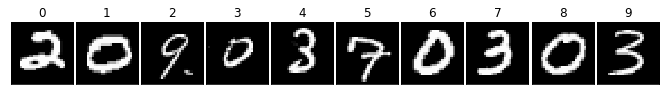

In [139]:

import matplotlib.pyplot as plt
%matplotlib inline

X_test = X_test.reshape(X_test.shape[0], 28, 28)

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.05, wspace=0.05)
index = 0 # 100*n
for i in range(0, 10):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i+index], cmap='gray')
    plt.title(str(i+index));

In [ ]:
# 判断が困難と思われるテストデータ(1~1000)

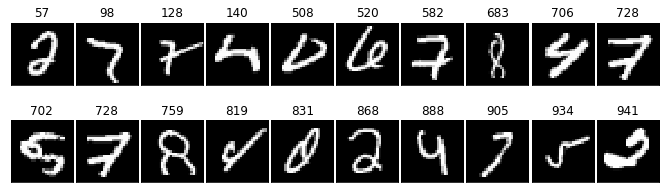

In [141]:

import matplotlib.pyplot as plt
%matplotlib inline

X_test = X_test.reshape(X_test.shape[0], 28, 28)

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.05, wspace=0.05)
index = 900
list1 = [57, 98, 128, 140, 508, 520, 582, 683, 706, 728, 702, 728, 759, 819, 831, 868, 888, 905, 934, 941]
for index, item in enumerate(list1):
    ax = fig.add_subplot(10, 10, index + 1, xticks=[], yticks=[])
    ax.imshow(X_test[item], cmap='gray')
    plt.title(item);
    

# モデル作成

In [126]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical

batch_size = 128
# 学習回数
epochs = 6

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

y_train= to_categorical(y_train)
# 最終的に出力される分類数 0~9 の10通り
num_classes = y_train.shape[1]

# 学習データ
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# モデルを作成
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## 学習のためのモデルを設定
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


## 学習開始
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
42000/42000 [==============================] - 90s 2ms/step - loss: 0.3168 - acc: 0.9015
Epoch 2/6
42000/42000 [==============================] - 89s 2ms/step - loss: 0.1011 - acc: 0.9689
Epoch 3/6
42000/42000 [==============================] - 88s 2ms/step - loss: 0.0730 - acc: 0.9784
Epoch 4/6
42000/42000 [==============================] - 97s 2ms/step - loss: 0.0597 - acc: 0.9814
Epoch 5/6
42000/42000 [==============================] - 85s 2ms/step - loss: 0.0493 - acc: 0.9851
Epoch 6/6
42000/42000 [==============================] - 86s 2ms/step - loss: 0.0450 - acc: 0.9861


# ファイル出力

In [128]:
# 学習データにフォーマットを合わせる
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)